# Tutorial 9: Part 2

In [1]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

## Example 2
Another test of SOMs applied to synthetic data

In [2]:
#create the input data (same as Tutorial 8, Example 2)

k = 2*np.pi/100
omega = 2*np.pi/50
x = [float(kk) for kk in range(100)]
t = [float(kk) for kk in range(200)]
x = np.asarray(x).reshape(-1,1)
t = np.asarray(t).reshape(-1,1)

y = np.empty((len(t),len(x)))
for jj in range(200):
    y[jj] = [np.sin(k*xkk - omega*t[jj]) for xkk in x]
    
#sin pattern w/ amplitude of 1
y0 = y[0,:]

#cosine pattern w/ amplitude of 0.5
y1 = 0.5*y[37,:]

#step pattern w/ amplitude of 0.8
y2 = np.empty_like(y1)
y2[:50] = -0.8
y2[50:] = 0.8

#sawtooth pattern w/ amplitude of 1
y3 = np.empty_like(y2)
y3[:25] = np.squeeze(-2*x[:25]/25 + 1)
y3[25:50] = np.squeeze(2*x[25:50]/25 - 3)
y3[50:75] = np.squeeze(-2*x[50:75]/25 + 5)
y3[75:] = np.squeeze(2*x[75:]/25 - 7)

#create timeseries where from t = 1:50 signal y0 occurs
ynew = np.empty((200,len(y0)))
ynew[:50] = y0

#then from t = 51:100 signal y1 occurs
ynew[50:100] = y1

#then from t = 101:150 signal y2 occurs
ynew[100:150] = y2

#then from t = 151:200 signal y3 occurs
ynew[150:] = y3

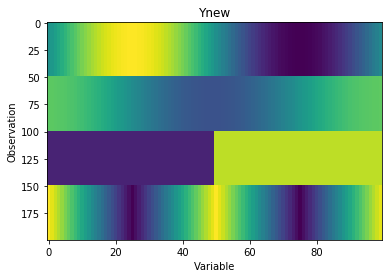

In [3]:
#visualize ynew
plt.imshow(ynew,aspect='auto')
plt.xlabel('Variable')
plt.ylabel('Observation')
plt.title('Ynew')
plt.show()

In [4]:
#run SOM -- this code creates/trains the SOM and calculates stats of interest

nx = 2
ny = 2

data = ynew

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
som.pca_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

#calculate the BMU of each observation
bmus = []
bmus_num = []
for kk in range(len(data)):
    bmus.append(som.winner(data[kk]))
    num = bmus[kk][0]*nx + bmus[kk][1]
    bmus_num.append(num)
    
#inds gives the sequential coordinates of each SOM node (useful for plotting)
inds = []
for ii in range(ny):
    for jj in range(nx):
        inds.append((ii,jj))
     
#compute the frequency of each BMU
freq = np.zeros((nx,ny))
for bmu in bmus:
    freq[bmu[0]][bmu[1]]+=1
freq/=len(data)

/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/minisom.py:300: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


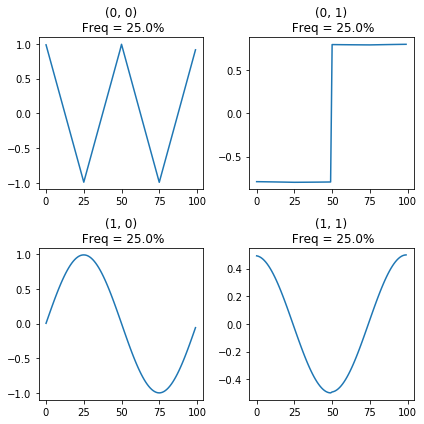

In [5]:
#visualize

plt.figure(figsize=(3*nx,3*ny))
for kk in range(nx*ny):   
    plt.subplot(ny,nx,kk+1)
    indx = inds[kk][1]
    indy = inds[kk][0]
    plt.plot(bmu_patterns[indx][indy])
    plt.title(str(inds[kk]) + '\n Freq = ' + str(freq[indx][indy]*100)[:4] + '%')
    
plt.tight_layout()

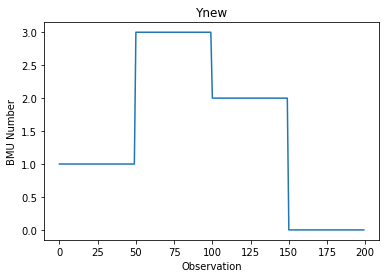

In [6]:
#visualize clustered data
plt.plot(bmus_num)
plt.xlabel('Observation')
plt.ylabel('BMU Number')
plt.title('Ynew')
plt.show()